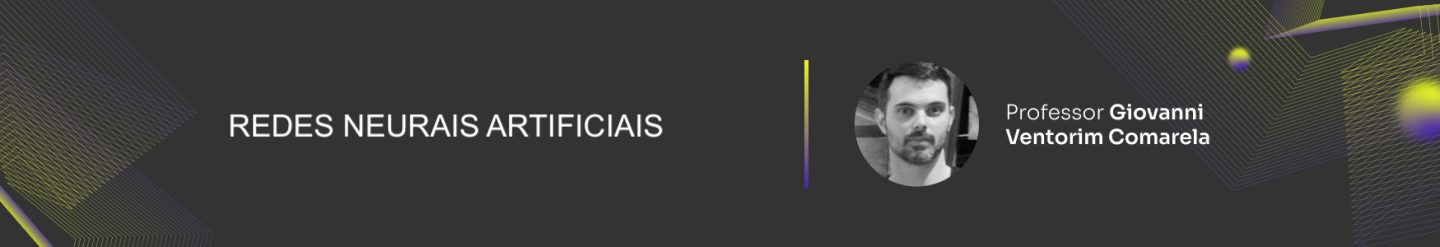

# MLP - Treinamento - *Backpropagation*

Nas aulas passadas, nós formalizamos a tarefa de treinamento de uma MLP. Nesta aula, nós veremos como os pesos da rede podem ser encontrados.

Para isso, nós estudaremos um algoritmo chamado *Backpropagation*.

Interessantemente, há na literatura uma certa divergência sobre definição do algoritmo. Alguns textos (e.g., [Mitchell, T., 1997] e [Zaki, M. e Meira Jr., W., 2020]) trazem o *backpropagation* como o algoritmo para aprender os pesos de uma rede neural, dado um conjunto de treinamento. Outros autores (e.g., [Goodfellow, I., 2016]) trazem a definição de que o algoritmo é referente apenas ao cômputo dos gradientes, etapa necessária para atualização dos pesos da rede quando se usa, por exemplo, o SGD (Descida do Gradiente Estocástica).

Nesta aula, discutiremos como fazer o cálculo dos gradientes de uma MLP. Em posse dos gradientes, a obtenção dos pesos é uma aplicação do SGD (aula passada).




Uma descrição do Algoritmo de *backpropagation* geral, i.e., para uma MLP com várias camadas ocultas e diferentes funções de ativação (exemplo na figura abaixo) está fora do escopo desta disciplina. Aos interessados em aprofundar os estudos sobre o tema, recomenda-se:
- **Leitura Introdutória/Intermediária**: Capítulo 4 de *Machine Learning*, Tom Mitchell (https://www.cs.cmu.edu/~tom/mlbook.html);
- **Leitura Intermediária/Avançada**: Capítulo 25 de *Data Mining and Machine Learning: Fundamental Concepts and Algorithms*, Mohammed J. Zaki, Wagner Meira, Jr. (https://dataminingbook.info/book_html/);
- **Leitura Avançada**: Capítulo 6 de *Deep Learning*, Ian Goodfellow, Yoshua Bengio and Aaron Courville (http://www.deeplearningbook.org).

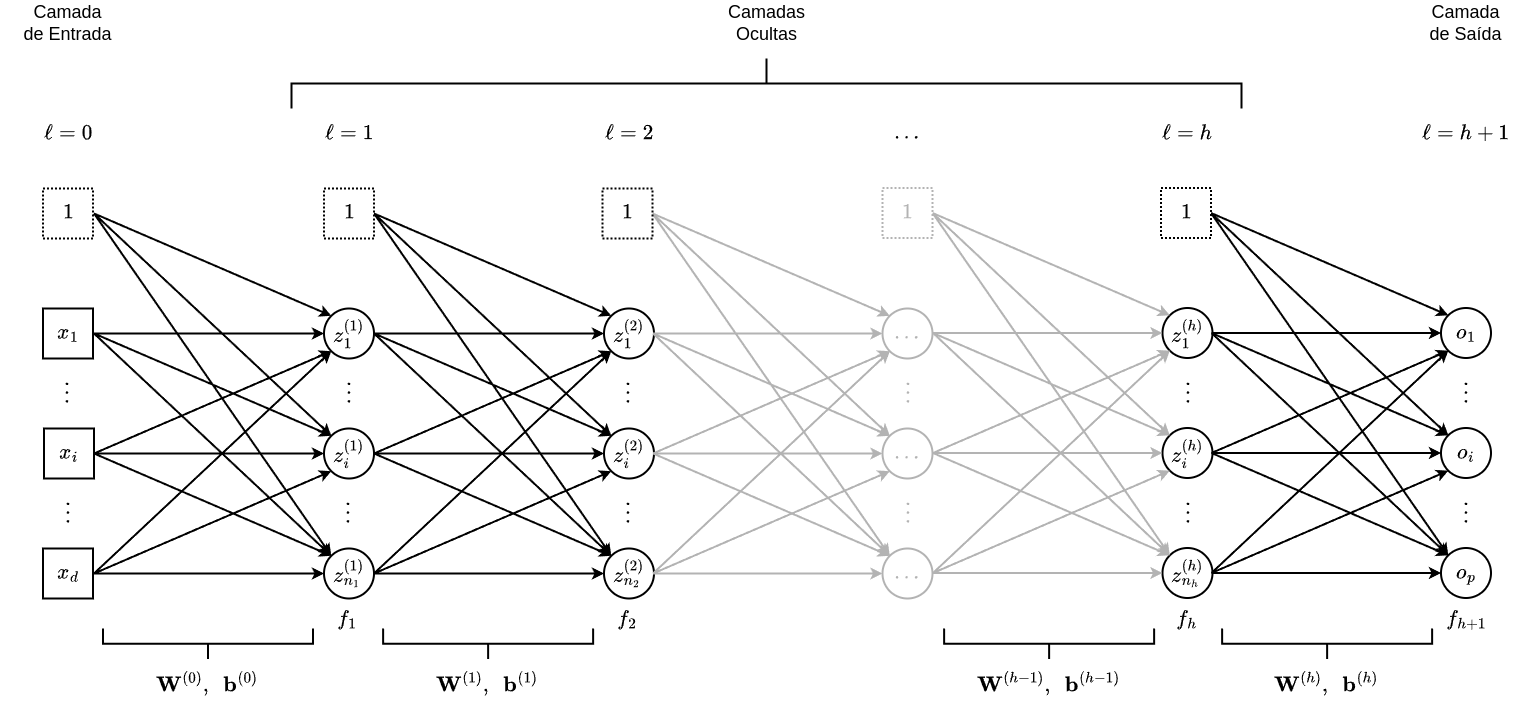

## *Backpropagation* - um exemplo

Apesar do algoritmo geral estar fora do nosso escopo, veremos o funcionamento e a intuição do *backpropagation* por meio de um exemplo.

Vamos ver como calcular os gradientes para a MLP da Figura abaixo (Lembre, já utilizamos essa MLP como exemplo em aulas passadas).

Após isso, combinaremos tais gradientes com o SGD para obter os pesos da rede para um conjunto de dados.

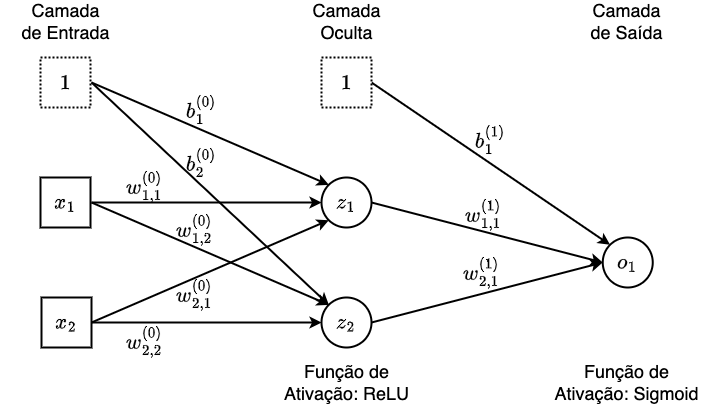

Nesse contexto, é importante enfatizar que estamos assumindo que:
- a arquitetura da rede (número de camadas, unidades por camadas e funções de ativação) já está definida como na figura.
- Nossa tarefa de aprendizado supervisionado de interesse é Classificação Binária.


Assim, nossa **pergunta de interesse para aula de hoje** é:
dado um conjunto de treinamento $D = \{(\mathbf{x}_i, y_i)\}_{i = 1}^n$, com $\mathbf{x}_i \in \mathbb{R}^2$ e $y_i \in \{0, 1\}$, referente a um problema de Classificação binária, como encontrar os melhores pesos ($w$'s) e vieses ($b$'s) da MLP acima para obter um classificador adequado?

Para responder a essa pergunta, utilizaremos o algoritmo de SGD (Descida do Gradiente Estocástica) visto na aula passada.

O desafio para proceder dessa maneira está em encontrar os gradientes de todos os parâmetros da rede.

No entanto, a estrutura e a forma como é feita a computação em uma MLP permitem que isso seja feito.

Como vimos na aula passada, o SGD é um processo iterativo. Em cada iteração, um par ordenado $(\mathbf{x}, y) \in D$ é processado em **duas fases**.

### Primeira fase - *Forward Propagation*

Dado um par $(\mathbf{x}, y) \in D$ e um conjunto de pesos ($w$'s) e vieses ($b$'s) sendo correntemente utilizados na MLP, na **Primeira Fase**, também chamada de fase de propagação (ou *Forward Propagation*), ocorre o cômputo de $\phi(\mathbf{x})$, ou seja, $\mathbf{x}$ é fornecido como entrada para a rede e são computadas as seguintes quantidades:
1. Camada Oculta

> $net_1 \leftarrow w^{(0)}_{1, 1}x_1 + w^{(0)}_{2, 1}x_2 + b^{(0)}_1$

> $net_2 \leftarrow w^{(0)}_{1, 2}x_1 + w^{(0)}_{2, 2}x_2 + b^{(0)}_2$

> $z_1 \leftarrow \text{ReLU}(net_1) = \max\{net_1, 0\}$

> $z_2 \leftarrow \text{ReLU}(net_2) = \max\{net_2, 0\}$

2. Camada de Saída

> $net \leftarrow w^{(1)}_{1, 1}z_1 + w^{(1)}_{2, 1}z_2 + b^{(1)}_1$

> $o_1 \leftarrow \text{Sigmoid}(net) = \sigma(net) = \frac{1}{1+e^{-net}}$

> $\phi(\mathbf{x}) \leftarrow o_1$

A computação acima deixa explícito o motivo do nome *Forward Propagation*, uma vez que as operações ocorrem "fluindo" nas camadas da esquerda para a direita, como ilustrado na figura abaixo.

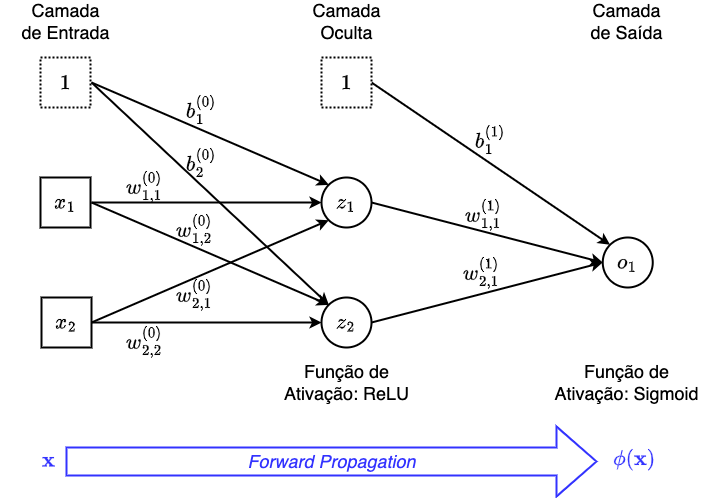

### Segunda fase - *Backpropagation*

Na **Segunda Fase** de cada iteração do SGD, a ideia é atualizar os parâmetros (pesos e vieses) que foram utilizados para computar $\phi(\mathbf{x})$ de forma a fazer $\phi(\mathbf{x})$ se aproximar de $y$ (a saída esperada).

Antes de apresentar os passos dessa fase, precisamos (re)fazer algumas definições.

Para comparar $\phi(\mathbf{x})$ e $y$ utilizamos a BCE (Entropia Cruzada Binária). Assim, vamos definir o "Erro" associado à $\mathbf{x}$ como sendo a BCE, ou seja:
$$E_{\mathbf{x}} = L(y, \phi(\mathbf{x})) = L(y, o_1) = - y\log(o_1) - (1-y)\log(1-o_1).$$

Dessa forma, para utilizarmos o SGD, precisamos calcular as derivadas parciais de $E_\mathbf{x}$ com relação a todos os parâmetros da rede.

E é aqui que vem a parte mais interessante! Podemos calcular tais derivadas camada por camada, da direita para a esquerda. Do mais, o trabalho feito para computar as derivadas referentes à camada de saída poderá ser aproveitado para calcular as derivadas da camada oculta. E é isso que faz ser possível a utilização do SGD de forma eficiente para treinar uma MLP.

A Figura abaixo ilustra o processo do cálculo das derivadas parciais.

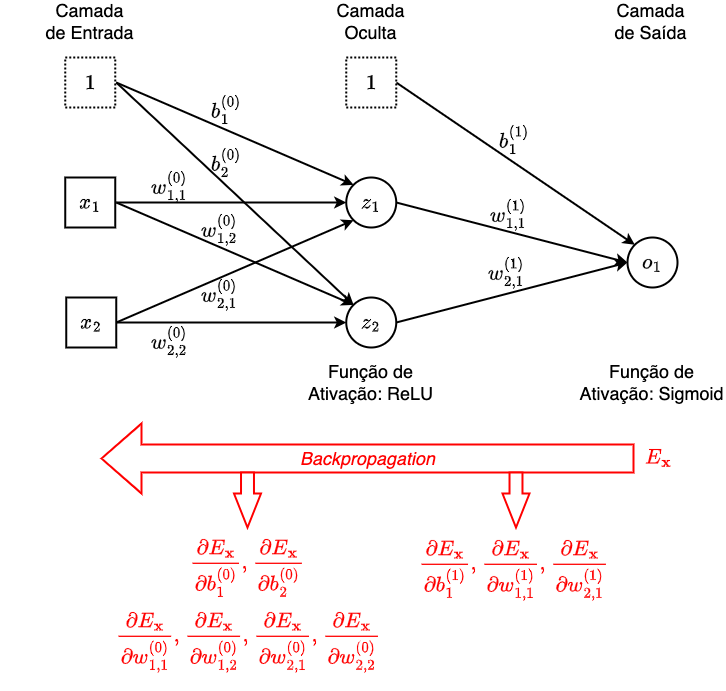

As computações para se obter cada uma das derivadas parciais apresentadas na Figura acima são detalhadas a seguir.

Por questões de espaço e escopo da disciplina, não faremos as demonstrações de como cada uma dessas derivadas pode ser obtida. No entanto, é importante mencionar que são necessárias apenas regras básicas de diferenciação em várias variáveis. Os leitores interessados nas demonstrações podem consultar os textos referenciados no início do material da aula de hoje.

1. Derivadas parciais - Camada de Saída

> $\delta \leftarrow o_1 - y$

> $\frac{\partial E_{\mathbf{x}}}{\partial b^{(1)}_1} \leftarrow \delta\text{, }$

> $\frac{\partial E_{\mathbf{x}}}{\partial w^{(1)}_{1,1}} \leftarrow \delta z_1$

> $\frac{\partial E_{\mathbf{x}}}{\partial w^{(1)}_{2,1}} \leftarrow \delta z_2$


2. Derivadas parciais - Camada Oculta

> $\frac{\partial \text{ReLU}(net_1)}{\partial net_1} \leftarrow \begin{cases}1\text{, se } net_1 > 0\\
0\text{, caso contrário}.\end{cases}$

> $\frac{\partial \text{ReLU}(net_2)}{\partial net_2} \leftarrow \begin{cases}1\text{, se } net_2 > 0\\
0\text{, caso contrário}.\end{cases}$

> $\delta_1 \leftarrow \delta \cdot w^{(1)}_{1,1} \cdot \frac{\partial \text{ReLU}(net_1)}{\partial net_1}$

> $\delta_2 \leftarrow \delta \cdot w^{(1)}_{2,1} \cdot \frac{\partial \text{ReLU}(net_1)}{\partial net_2}$

> $\frac{\partial E_{\mathbf{x}}}{\partial b^{(0)}_1} \leftarrow \delta_1$

> $\frac{\partial E_{\mathbf{x}}}{\partial b^{(0)}_2} \leftarrow \delta_2$

> $\frac{\partial E_{\mathbf{x}}}{\partial w^{(0)}_{1,1}} \leftarrow \delta_1x_1$

> $\frac{\partial E_{\mathbf{x}}}{\partial w^{(0)}_{1,2}} \leftarrow  \delta_2x_1$

> $\frac{\partial E_{\mathbf{x}}}{\partial w^{(0)}_{2,1}} \leftarrow  \delta_1x_2$

> $\frac{\partial E_{\mathbf{x}}}{\partial w^{(0)}_{2,2}} \leftarrow  \delta_2x_2$


Na derivação acima, pode-se perceber que o valor de $\delta$ foi reutilizado para os cálculos de $\delta_1$ e $\delta_2$.
Ou seja, para calcular as derivadas parciais referentes à camada oculta foram utilizadas informações da camada oculta e resultados parciais relativos à camada de saída.

Caso a rede tivesse outras camadas ocultas, isso continuaria valendo. Ou seja, para calcular as derivadas parciais referentes à camada $\ell$ apenas informações das camadas $\ell$ e $\ell + 1$ são necessárias. Esse "reuso" das computações entre camadas faz com que as derivadas parciais, e por consequência, os gradientes, possam ser computadas de maneira eficiente.

De forma análoga à fase de *forward propagation*, como aqui as computações são realizadas "fluindo" das camadas da direita para a esquerda, essa fase tem o nome de *backpropagation*.

### Será que funciona?

Para verificar se os cálculos das derivadas parciais, como apresentados acima, vamos aplicá-los junto ao SGC (Descida do Gradiente Estocástica).

Para isso, vamos utilizar um conjunto de dados apresentado em aulas anteriores.

Os dados são apresentados abaixo, tanto em um `DataFrame`, quando em uma representação gráfica. Mencionando novamente, esse problema de classificação é conhecido, informalmente, como XOR.

In [ ]:
#@title

import numpy as np
import pandas as pd

df = pd.DataFrame(
    [[2, 1, 1],
     [1, 2, 1],
     [3, 3, 1],
     [-2, -1, 1],
     [-1, -2, 1],
     [-3, -3, 1],
     [2, -1, 0],
     [1, -2, 0],
     [3, -3, 0],
     [-2, 1, 0],
     [-1, 2, 0],
     [-3, 3, 0]], columns = 'x1 x2 Classe'.split())

df

,x1,x2,Classe
0,2,1,1
1,1,2,1
2,3,3,1
3,-2,-1,1
4,-1,-2,1
5,-3,-3,1
6,2,-1,0
7,1,-2,0
8,3,-3,0
9,-2,1,0


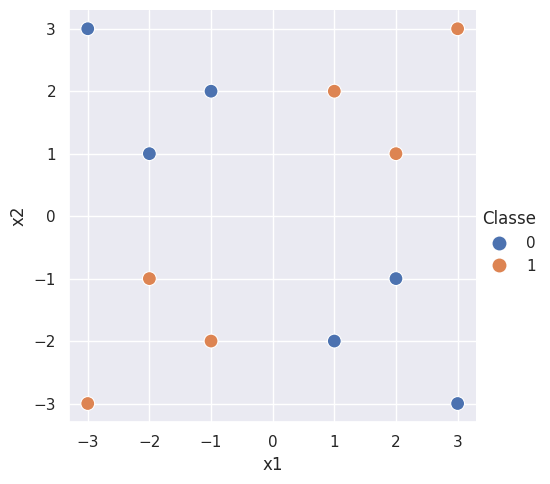

In [ ]:
#@title

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.relplot(data = df, x = 'x1', y = 'x2', hue = 'Classe', s = 100);

O código abaixo apresenta uma função para fazer a atualização dos parâmetros da MLP, chamada `sgd_iteration`. Essa função é chamada em cada iteração do SGD.

Alguns detalhes importantes da função são comentados no próprio código.

É importante mencionar que a mesma função poderia ser implementada de maneira muito mais eficiente utilizando operações matriciais/vetorizadas. Uma abordagem menos eficiente foi utilizada aqui para apresentar todos os passos de forma mais clara.

In [ ]:
# Realiza a Forward Propagation
# Dado x, calcula phi(x)
def forward_propagation(x, W0, W1, b0, b1):
  net1 = W0[0][0] * x[0] + W0[1][0] * x[1] + b0[0] # Combinação linear da entrada + viés
  net2 = W0[0][1] * x[0] + W0[1][1] * x[1] + b0[1] # Combinação linear da entrada + viés
  z1 = max(net1, 0)                                # ReLU
  z2 = max(net2, 0)                                # ReLU
  net = W1[0][0] * z1 + W1[1][0] * z2 + b1[0]      # Combinação linear da camada oculta + viés
  o = 1 / (1 + np.exp(-net))                       # Sigmoid
  return o, z1, z2, net1, net2

# Com base na saída da primeira fase (Forward Propagation),
# Calcula as derivadas parciais do erro com respeito aos parâmetros e
# ajusta os pesos e vieses da rede
def backpropagation(x, y, o, z1, z2, net1, net2, W0, W1, b0, b1, learning_rate):

  # Derivadas parciais relativas à Camada de Saída
  # Cálculo do delta
  delta = o - y

  # viés b1
  g_b1_1 = delta

  # Matriz de Pesos W1
  g_w1_11 = delta * z1
  g_w1_21 = delta * z2

  # Derivadas parciais relativas à Camada Oculta
  # deltas
  delta1 = delta * W1[0][0] * (1 if net1 > 0 else 0)
  delta2 = delta * W1[1][0] * (1 if net2 > 0 else 0)

  # vetor b
  g_b0_1 = delta1
  g_b0_2 = delta2

  # Matriz W0
  g_w0_11 = delta1 * x[0]
  g_w0_12 = delta2 * x[0]
  g_w0_21 = delta1 * x[1]
  g_w0_22 = delta2 * x[1]

  # Atualizando os pesos da rede utilizando a Regra da Descida do Gradiente
  # Matriz W0
  W0[0][0] = W0[0][0] - learning_rate * g_w0_11
  W0[0][1] = W0[0][1] - learning_rate * g_w0_12
  W0[1][0] = W0[1][0] - learning_rate * g_w0_21
  W0[1][1] = W0[1][1] - learning_rate * g_w0_22

  # Matriz W1
  W1[0][0] = W1[0][0] - learning_rate * g_w1_11
  W1[1][0] = W1[1][0] - learning_rate * g_w1_21

  # Vetor b0
  b0[0] = b0[0] - learning_rate * g_b0_1
  b0[1] = b0[1] - learning_rate * g_b0_2

  # Vetor b1
  b1[0] = b1[0] - learning_rate * g_b1_1

# Realiza uma iteração do SGD
# x: vetor de entrada
# y: rótulo conhecido de x
# W0 e b0: matriz de pesos e vetor de vieses da camada oculta
# W1 e b1: matriz de pesos e viés da camada de saída
# learning_rate: taxa de aprendizado do SGD
def sgd_iteration(x, y, W0, W1, b0, b1, learning_rate):
  # Cada iteração alterna executa:
  # Forward Propagation
  # Backpropagation
  o, z1, z2, net1, net2 = forward_propagation(x, W0, W1, b0, b1)
  backpropagation(x, y, o, z1, z2, net1, net2, W0, W1, b0, b1, learning_rate)

In [ ]:
import numpy as np

# número de vezes que o SGD vai iterar sobre o conjunto de dados todo
m = 2000

# taxa de aprendizado do SGD
learning_rate = 0.001

# Inicialização dos parâmetros da rede
# todos os valores são inicializados com um número pseudo-aleatórios entre -1 e 1
np.random.seed(42)
W0 = np.random.uniform(low=-1, high=1, size=(2,2))
W1 = np.random.uniform(low=-1, high=1, size=(2,1))
b0 = np.random.uniform(low=-1, high=1, size=(2,))
b1 = np.random.uniform(low=-1, high=1, size=(1,))

print('Parâmetros iniciais da rede:')
print('W0:')
print(W0)
print('W1:')
print(W1)
print('b0:')
print(b0)
print('b1:')
print(b1)
print('\n')

# iterando sobre o conjunto de dados como um todo
for i in range(m):
  # iterando sobre cada elemento do conjunto de dados
  df.apply(lambda row: sgd_iteration(row[['x1', 'x2']].values, row.Classe, W0, W1, b0, b1, learning_rate), axis = 1)

print('Parâmetros finais, obtidos pelo SGD:')
print('W0:')
print(W0)
print('W1:')
print(W1)
print('b0:')
print(b0)
print('b1:')
print(b1)
print('\n')

Parâmetros iniciais da rede:
W0:
[[-0.25091976  0.90142861]
 [ 0.46398788  0.19731697]]
W1:
[[-0.68796272]
 [-0.68801096]]
b0:
[-0.88383278  0.73235229]
b1:
[0.20223002]


Parâmetros finais, obtidos pelo SGD:
W0:
[[-1.20406683  1.11512455]
 [ 1.20416305 -1.1149737 ]]
W1:
[[-1.91538984]
 [-1.27861408]]
b0:
[-1.16553886 -0.2516159 ]
b1:
[2.06056876]




Após aplicar o SGD no conjunto de dados, podemos ver, pela saída do código acima, que os pesos e vieses encontrados pelo SGD são consideravelmente diferentes dos valores da inicialização.

Mas será que esses parâmetros encontrados são adequados ao conjunto de dados?

Na Figura abaixo, temos as regiões de decisão obtidas com o modelo treinado via SGD.

Pode-ser perceber que o classificador gerado se adapta bem aos dados do conjunto de treinamento e consegue fazer a separação perfeita das duas classes.

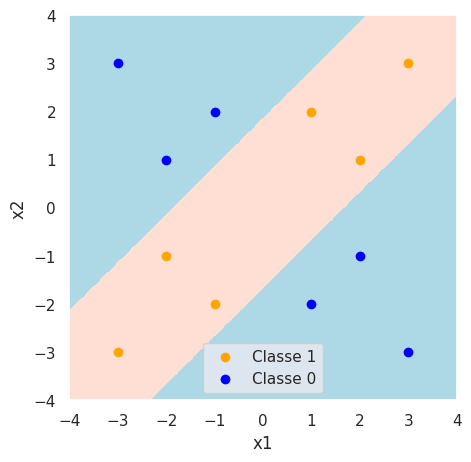

In [ ]:
#@title

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#ADD8E6', '#AAFFAA', '#ffdfd4'])

h = .01
x_min, x_max = -4, 4
y_min, y_max = -4, 4
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

f, axs = plt.subplots(1, 1, figsize=(5, 5))

Z = np.array([forward_propagation(np.array([x1, x2]), W0, W1, b0, b1)[0] > 0.5 for x1, x2 in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
axs.pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')

axs.scatter(df[df['Classe'] == 1]['x1'], df[df['Classe'] == 1]['x2'], color = 'orange', label = 'Classe 1')
axs.scatter(df[df['Classe'] == 0]['x1'], df[df['Classe'] == 0]['x2'], color = 'blue', label = 'Classe 0')

plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.legend(loc = 8);

Apesar de ser um método muito poderoso para o treinamento de redes neurais, a utilização do algoritmo de *backpropagation* também traz uma série de desafios e armadilhas, assim como veremos nas próximas aulas!

## Referências

- Machine Learning, Tom Mitchell, McGraw Hill, 1997 (https://www.cs.cmu.edu/~tom/mlbook.html).

- Mohammed J. Zaki, Wagner Meira, Jr., Data Mining and Machine Learning: Fundamental Concepts and Algorithms, 2nd Edition, Cambridge University Press, March 2020 (https://dataminingbook.info/book_html/).

- Ian Goodfellow, Yoshua Bengio and Aaron Courville, Deep Learning, MIT Press, 2016 (http://www.deeplearningbook.org).